In [1]:
import accelerator_environments
import gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import DDPG
from stable_baselines3.ddpg.policies import CnnPolicy
import pydoocs

In [2]:
# env = gym.make("ARESExperimentalArea-Ocelot-v0")
env = gym.make("ARESExperimentalArea-Real-v0")

/var/home/aresoper/.conda/envs/aresai2/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [12]:
saved_policy = CnnPolicy.load("ddpg_policy_10000.pkl")

In [16]:
observation = env.reset()
# print(f"{env.areamqzm1.k1:.3f}, {env.areamqzm1.k2:.3f}, {env.areamqzm1.k3:.3f}")

i = 0
actions, observations = [], []
for _ in range(10):
    print(f"\rStep {i}", end="")
    print(f"\rAREAMZQM1: {env.areamqzm1.k1:.3f}, AREAMZQM2: {env.areamqzm2.k1:.3f}, AREAMZQM3: {env.areamqzm3.k1:.3f}, score: {np.sum(env.poisson_weights*np.squeeze(observation)):.2f}")
    observations.append(observation)
    action, _state = saved_policy.predict(observation, deterministic=True)
    actions.append(action)
    observation, reward, done, info = env.step(action)
    i += 1
observations = np.array(observations)
actions = np.array(actions)

AREAMZQM1: -8.958, AREAMZQM2: 8.699, AREAMZQM3: 2.465, score: 4635.91
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00
AREAMZQM1: -0.286, AREAMZQM2: 0.676, AREAMZQM3: -0.164, score: 0.00


In [13]:
# model = DDPG("CnnPolicy", env, buffer_size=500000, verbose=2)

# path_to_model = "/beegfs/desy/user/stein/"
# file = "model_maxwell_10000"
# model.load(f"{file}")
# file = "model2"
# model.load(f"{path_to_model}{file}")


SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/


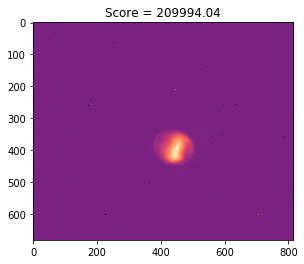

In [5]:
observation = env.reset()
plt.imshow(env.observation, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.observation):.2f}")
plt.show()

In [5]:
observation = env.reset()
# print(f"{env.areamqzm1.k1:.3f}, {env.areamqzm1.k2:.3f}, {env.areamqzm1.k3:.3f}")

i = 0
actions, observations = [], []
for _ in range(10):
    print(f"\rStep {i}", end="")
    print(f"\rAREAMZQM1: {env.areamqzm1.k1:.3f}, AREAMZQM2: {env.areamqzm2.k1:.3f}, AREAMZQM3: {env.areamqzm3.k1:.3f}, score: {np.sum(env.poisson_weights*np.squeeze(observation)):.2f}")
    observations.append(observation)
    action, _state = model.predict(observation, deterministic=True)
    actions.append(action)
    observation, reward, done, info = env.step(action)
    i += 1
observations = np.array(observations)
actions = np.array(actions)

AREAMZQM1: 6.125, AREAMZQM2: -10.566, AREAMZQM3: 9.150, score: 5283.60
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.86
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90


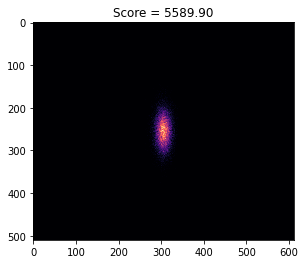

In [6]:
obs = observations[-1]
plt.imshow(obs, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.poisson_weights*np.squeeze(obs)):.2f}")
plt.show()

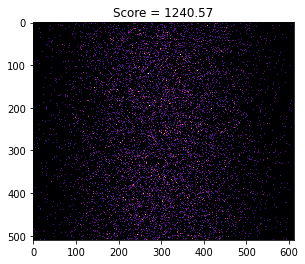

In [42]:
obs = observations[0]
plt.imshow(obs, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.poisson_weights*np.squeeze(obs)):.2f}")
plt.show()

In [ ]:

plt.imshow(env., cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.poisson_weights*np.squeeze(obs)):.2f}")
plt.show()

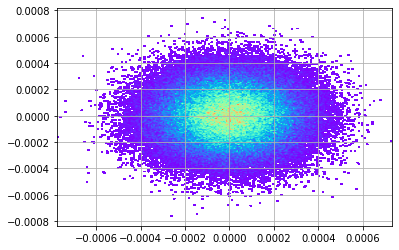

In [65]:
import ocelot.gui.accelerator as ocg
p = env.env.initial_particles
ocg.show_density(p.x(),p.y())